# License statistics
In this notebook we demonstrate how to retrieve our link collection as pandas DataFrame and how to plot some statistics from it, e.g. showing which licenses are used by who.

In [1]:
import pandas as pd
from generate_link_lists import load_dataframe
import matplotlib.pyplot as plt

## Data import and cleaning

In [2]:
df = load_dataframe("../resources/")

Adding blog_posts.yml
Adding events.yml
Adding materials.yml
Adding nfdi4bioimage.yml
Adding papers.yml
Adding workflow-tools.yml
Adding youtube_channels.yml


In [3]:
df.head(4)

,name,authors,type,url,tags,license,event_date,event_location,description,publication_date
0,Sharing Your Poster on Figshare: A Community G...,Elisabeth Kugler,blog,https://focalplane.biologists.com/2023/07/26/s...,"[sharing, research data management]",NaN,NaN,NaN,NaN,NaN
1,Running Deep-Learning Scripts in the BiA-PoL O...,Marcelo Zoccoler,blog,https://biapol.github.io/blog/marcelo_zoccoler...,"[python, artificial intelligence, bioimage ana...",CC BY 4.0,NaN,NaN,NaN,NaN
2,Browsing the Open Microscopy Image Data Resour...,Robert Haase,blog,https://biapol.github.io/blog/robert_haase/bro...,"[omero, python]",CC BY 4.0,NaN,NaN,NaN,NaN
3,Getting started with Mambaforge and Python,Mara Lampert,blog,https://biapol.github.io/blog/mara_lampert/get...,"[python, conda, mamba]",CC BY 4.0,NaN,NaN,NaN,NaN


In [4]:
# turn lists in colums to strings
df = df.astype(str)

# replace NaNs with ""
df = df.fillna("")

for column in df.columns:
    df[column] = df[column].str.lower()

## Filtering licenses by Author

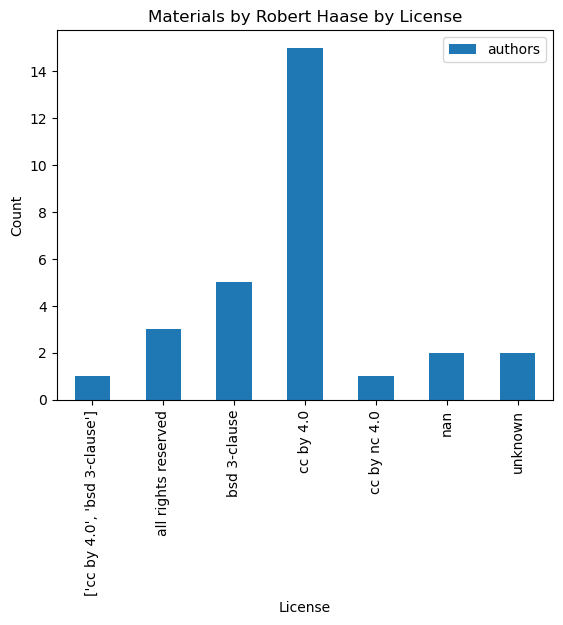

In [5]:
# Find materials from specific author
filtered_df = df[df['authors'].str.contains('Robert Haase', case=False)][['license', 'authors']]

# Group by license and count entries
grouped_df = filtered_df.groupby('license')
license_counts = grouped_df.count()

# Draw bar plot
license_counts.plot(kind='bar')
plt.xlabel('License')
plt.ylabel('Count')
plt.title('Materials by Robert Haase by License')
plt.show()

## Filtering licenses by tag

In [6]:
import matplotlib.pyplot as plt

# Step 1
df['artificial_intelligence'] = df['tags'].str.contains('artificial intelligence', case=False)
df['bioimage_analysis'] = df['tags'].str.contains('bioimage analysis', case=False)
df['research_data_management'] = df['tags'].str.contains('research data management', case=False)

# Step 2
filtered_df = df[(df['artificial_intelligence'] == True) | (df['bioimage_analysis'] == True) | (df['research_data_management'] == True)]

filtered_df = filtered_df[['license', 'artificial_intelligence', 'bioimage_analysis', 'research_data_management']]
filtered_df.head(5)

,license,artificial_intelligence,bioimage_analysis,research_data_management
0,nan,False,False,True
1,cc by 4.0,True,True,False
4,nan,False,False,True
5,nan,False,False,True
6,nan,False,True,False


In [7]:
# group by license and count
grouped_df = filtered_df.groupby('license')
license_counts = grouped_df.sum()

# select counts > 1
selected_license_counts = license_counts[(license_counts['artificial_intelligence'] > 1) |
(license_counts['bioimage_analysis'] > 1) |
(license_counts['research_data_management'] > 1) ]
selected_license_counts

,artificial_intelligence,bioimage_analysis,research_data_management
license,,,
all rights reserved,0,7,3
bsd 3-clause,0,10,0
cc by 4.0,3,12,19
gpl-3.0,0,2,0
mit,2,4,0
nan,0,19,8
unknown,20,37,1


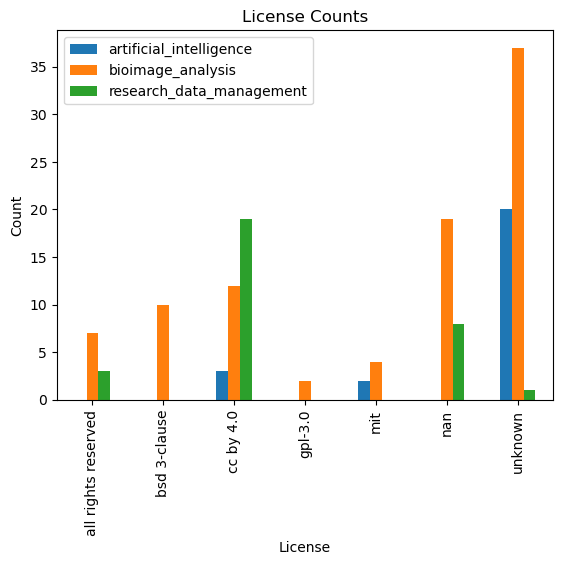

In [8]:
# plot
selected_license_counts.plot(kind='bar')
plt.xlabel('License')
plt.ylabel('Count')
plt.title('License Counts')
plt.show()

## Filtering licenses by community

In [9]:
df['neubias'] = df['tags'].str.contains('neubias', case=False)
df['nfdi4bioimage'] = df['tags'].str.contains('nfdi4bioimage', case=False)
df['omero'] = df['tags'].str.contains('omero', case=False)


# Step 2
filtered_df = df[(df['neubias'] == True) | (df['nfdi4bioimage'] == True) | (df['omero'] == True)]

filtered_df = filtered_df[['license',  'tags', 'neubias', 'nfdi4bioimage', 'omero']]
filtered_df.head(5)

,license,tags,neubias,nfdi4bioimage,omero
2,cc by 4.0,"['omero', 'python']",False,False,True
14,nan,"['omero', 'reseach data management']",False,False,True
24,cc by 4.0,['omero'],False,False,True
25,unknown,['omero'],False,False,True
26,bsd 2-clause,['omero'],False,False,True


In [10]:
# group by license and count
grouped_df = filtered_df.groupby('license')
license_counts = grouped_df.sum()

# select counts > 1
selected_license_counts = license_counts[(license_counts['neubias'] > 1) |
(license_counts['nfdi4bioimage'] > 1) |
(license_counts['omero'] > 1) ]
selected_license_counts

,tags,neubias,nfdi4bioimage,omero
license,,,,
bsd 2-clause,['omero']['omero']['omero']['omero'],0,0,4
bsd 3-clause,"['neubias', 'imagej', 'bioimage analysis']['ne...",6,0,0
cc by 4.0,"['omero', 'python']['omero']['neubias', 'bioim...",3,8,3
nan,"['omero', 'reseach data management']['neubias'...",1,0,2
unknown,"['omero']['neubias', 'bioimage analysis']['neu...",14,0,1


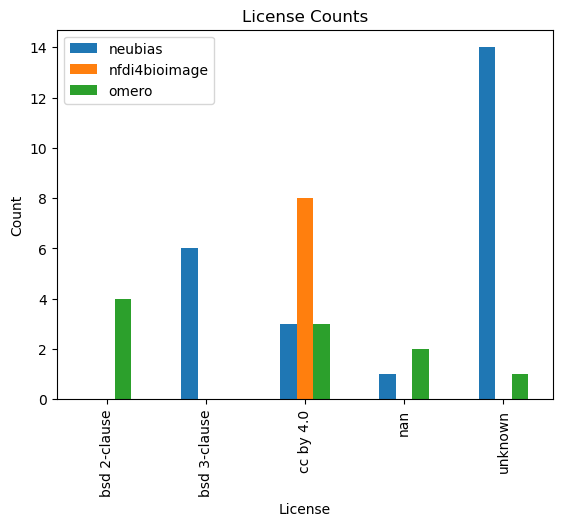

In [11]:
# plot
selected_license_counts.plot(kind='bar')
plt.xlabel('License')
plt.ylabel('Count')
plt.title('License Counts')
plt.show()